<a href="https://colab.research.google.com/github/kovanika/kovanika.github.io/blob/main/%D0%A4%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Факторный анализ. Влияние показателей жизненно-важных функций органзима на развитие сахарного диабета

## Подключение библиотек и подготовка данных

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 363.6 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 32.8 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=cfbe6d8929f9832b4deb1ad694128fd17e17038e84dedab18834c28085049610
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from statsmodels.multivariate.factor import Factor
from sklearn.decomposition import FactorAnalysis
import scipy.stats as stats
import seaborn as sns
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from pandas.plotting import scatter_matrix

Сначала прочитаем csv файл


In [ ]:
df = pd.read_csv('/content/diabetes.csv', sep=',')
df_original = pd.read_csv('/content/diabetes.csv', sep=',')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Создадим датафрейм который будет хранить названия столбцов

In [ ]:
list_name = ['HighBP',	'HighChol',	'CholCheck',	'BMI',	'Smoker',	'Stroke',	'HeartDiseaseorAttack',	'PhysActivity',	'Fruits',	'Veggies',	'HvyAlcoholConsump',	'AnyHealthcare',	'NoDocbcCost',	'GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk',	'Sex',	'Age',	'Education']
questions = pd.DataFrame(list_name)

В данном датасете присутствует колонка Diabets_012 которая хранит в себе данные о наличии диабета у человека. Для чистоты эксперимента удалим ее

In [ ]:

del df['Diabetes_012']
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Необходимо узнать типы данных в исследуемой датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105280 entries, 0 to 105279
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                105280 non-null  float64
 1   HighChol              105280 non-null  float64
 2   CholCheck             105280 non-null  float64
 3   BMI                   105280 non-null  float64
 4   Smoker                105280 non-null  float64
 5   Stroke                105280 non-null  float64
 6   HeartDiseaseorAttack  105280 non-null  float64
 7   PhysActivity          105279 non-null  float64
 8   Fruits                105279 non-null  float64
 9   Veggies               105279 non-null  float64
 10  HvyAlcoholConsump     105279 non-null  float64
 11  AnyHealthcare         105279 non-null  float64
 12  NoDocbcCost           105279 non-null  float64
 13  GenHlth               105279 non-null  float64
 14  MentHlth              105279 non-null  float64
 15  

Проверка на NaN

In [ ]:
print("Изначальная длина датасета",len(df))
df = df.dropna()
print("Количество непустых строк:", len(df))

Изначальная длина датасета 105280
Количество непустых строк: 105279


Все исследуемые величины имеют приемлемый тип данных, можно начать нормировку

In [ ]:
df_norm = (df-df.min())/(df.max() - df.min())
df_norm.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.00,0.6,0.5,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.500000,1.0,0.000000
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.00,1.0,1.0,1.0,0.0,0.666667,0.6,1.000000
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.833333,0.4,0.714286
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,0.8,0.428571


Данные нормированы, и приведены к одной размерности, можно приступать к анализу

Построим матрицу корреляции

Text(0.5, 1.0, 'correlation of feature')

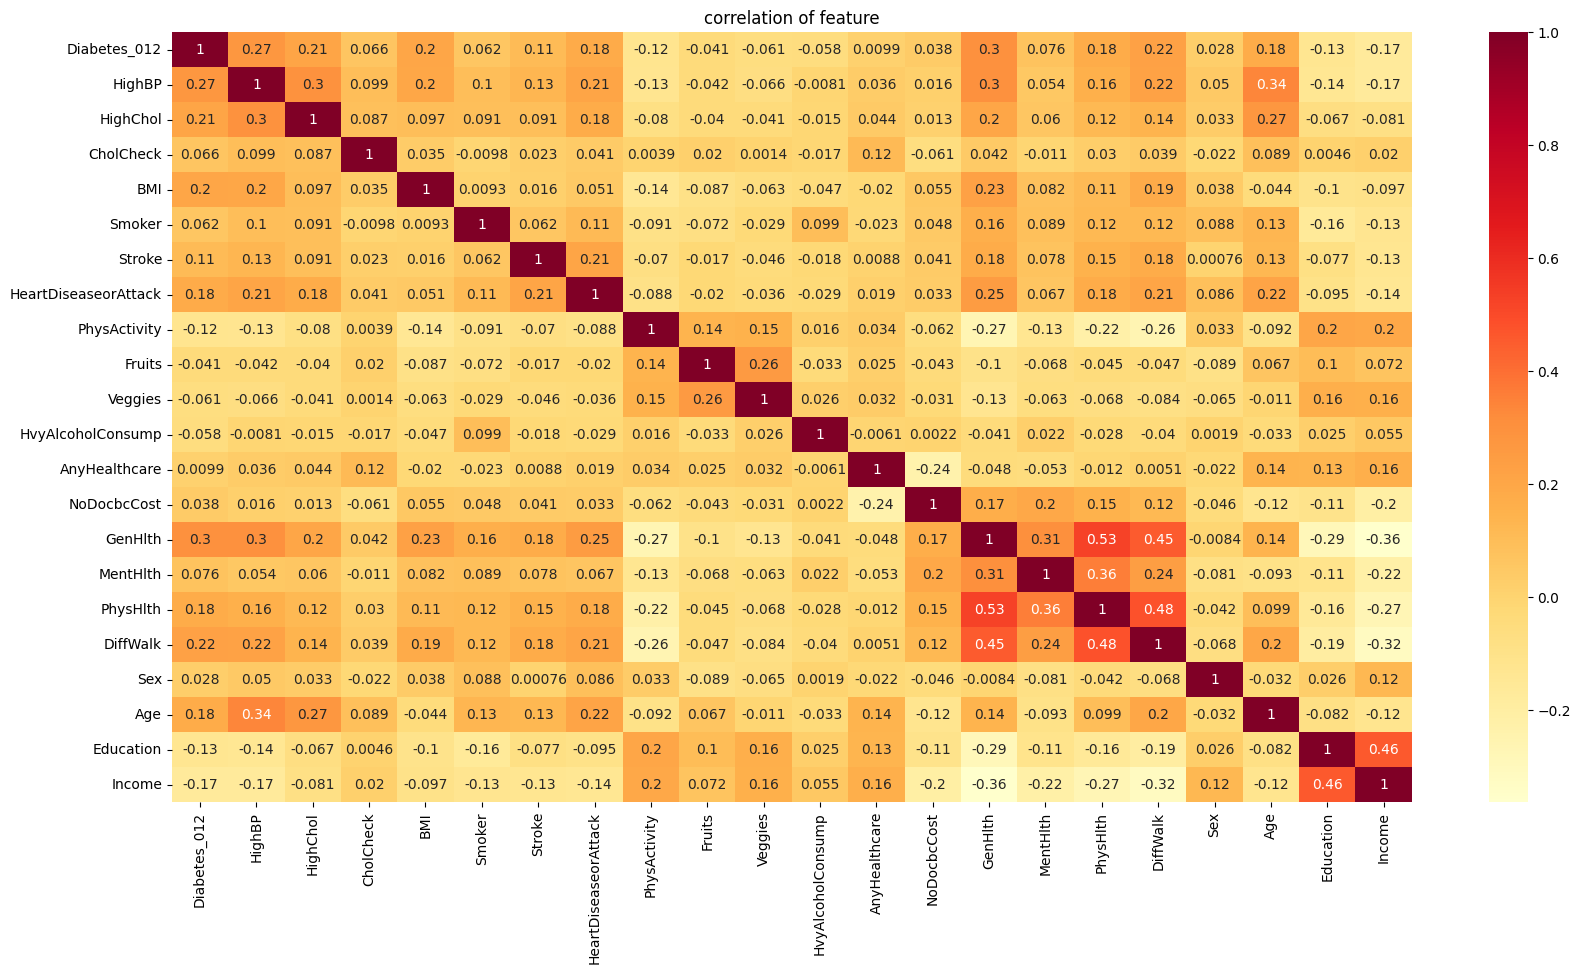

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df_original.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

Оценим влияние факторов на заболеваемость Диабетом

In [ ]:
df_original.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


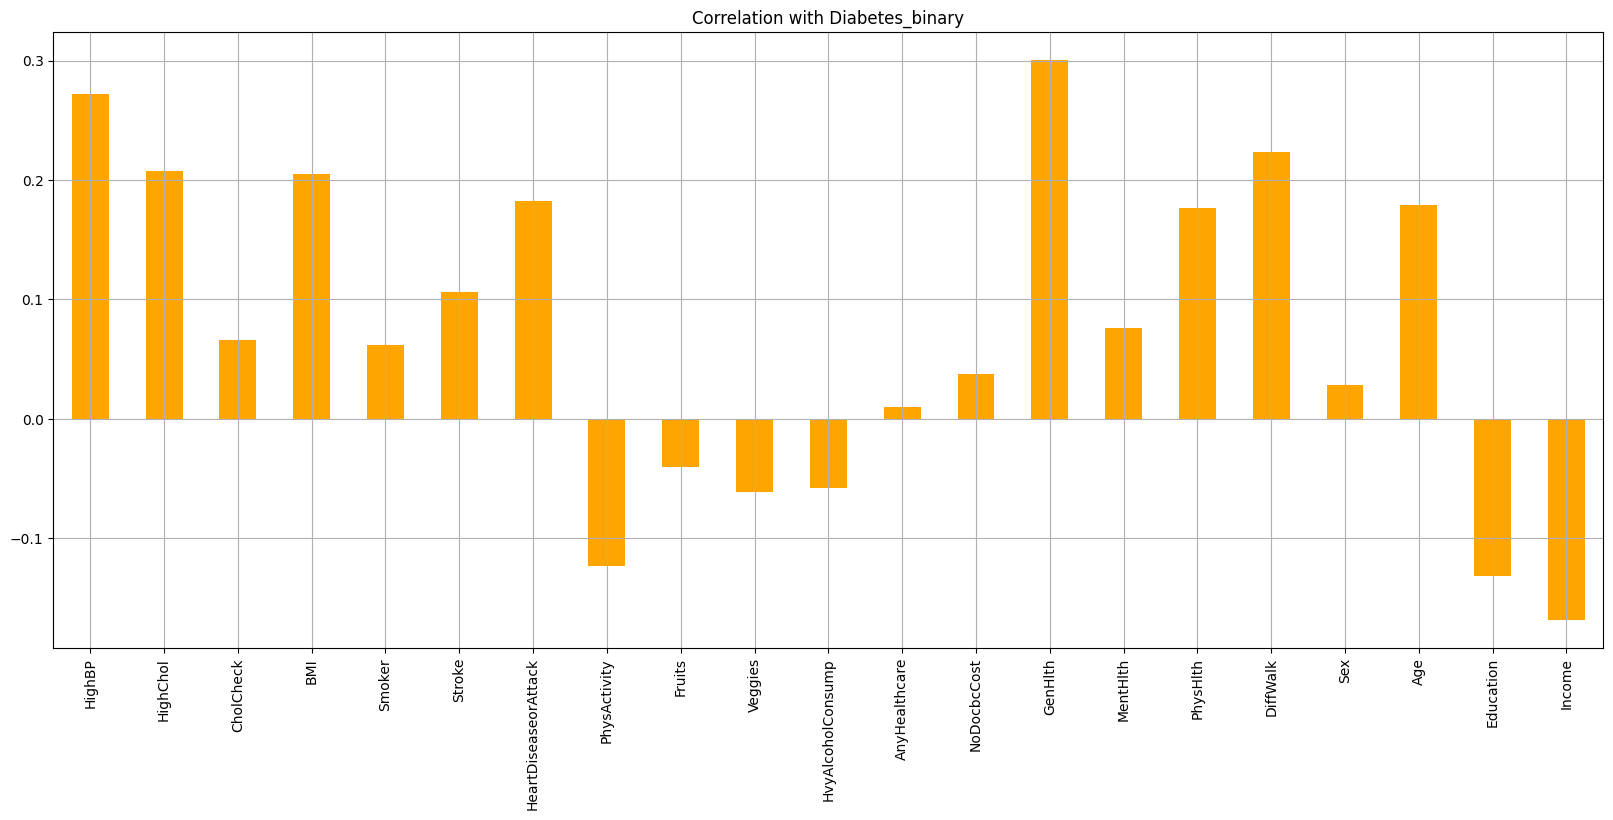

In [ ]:
df.corrwith(df_original.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Orange");

Оценим распределение обьясняющих величин

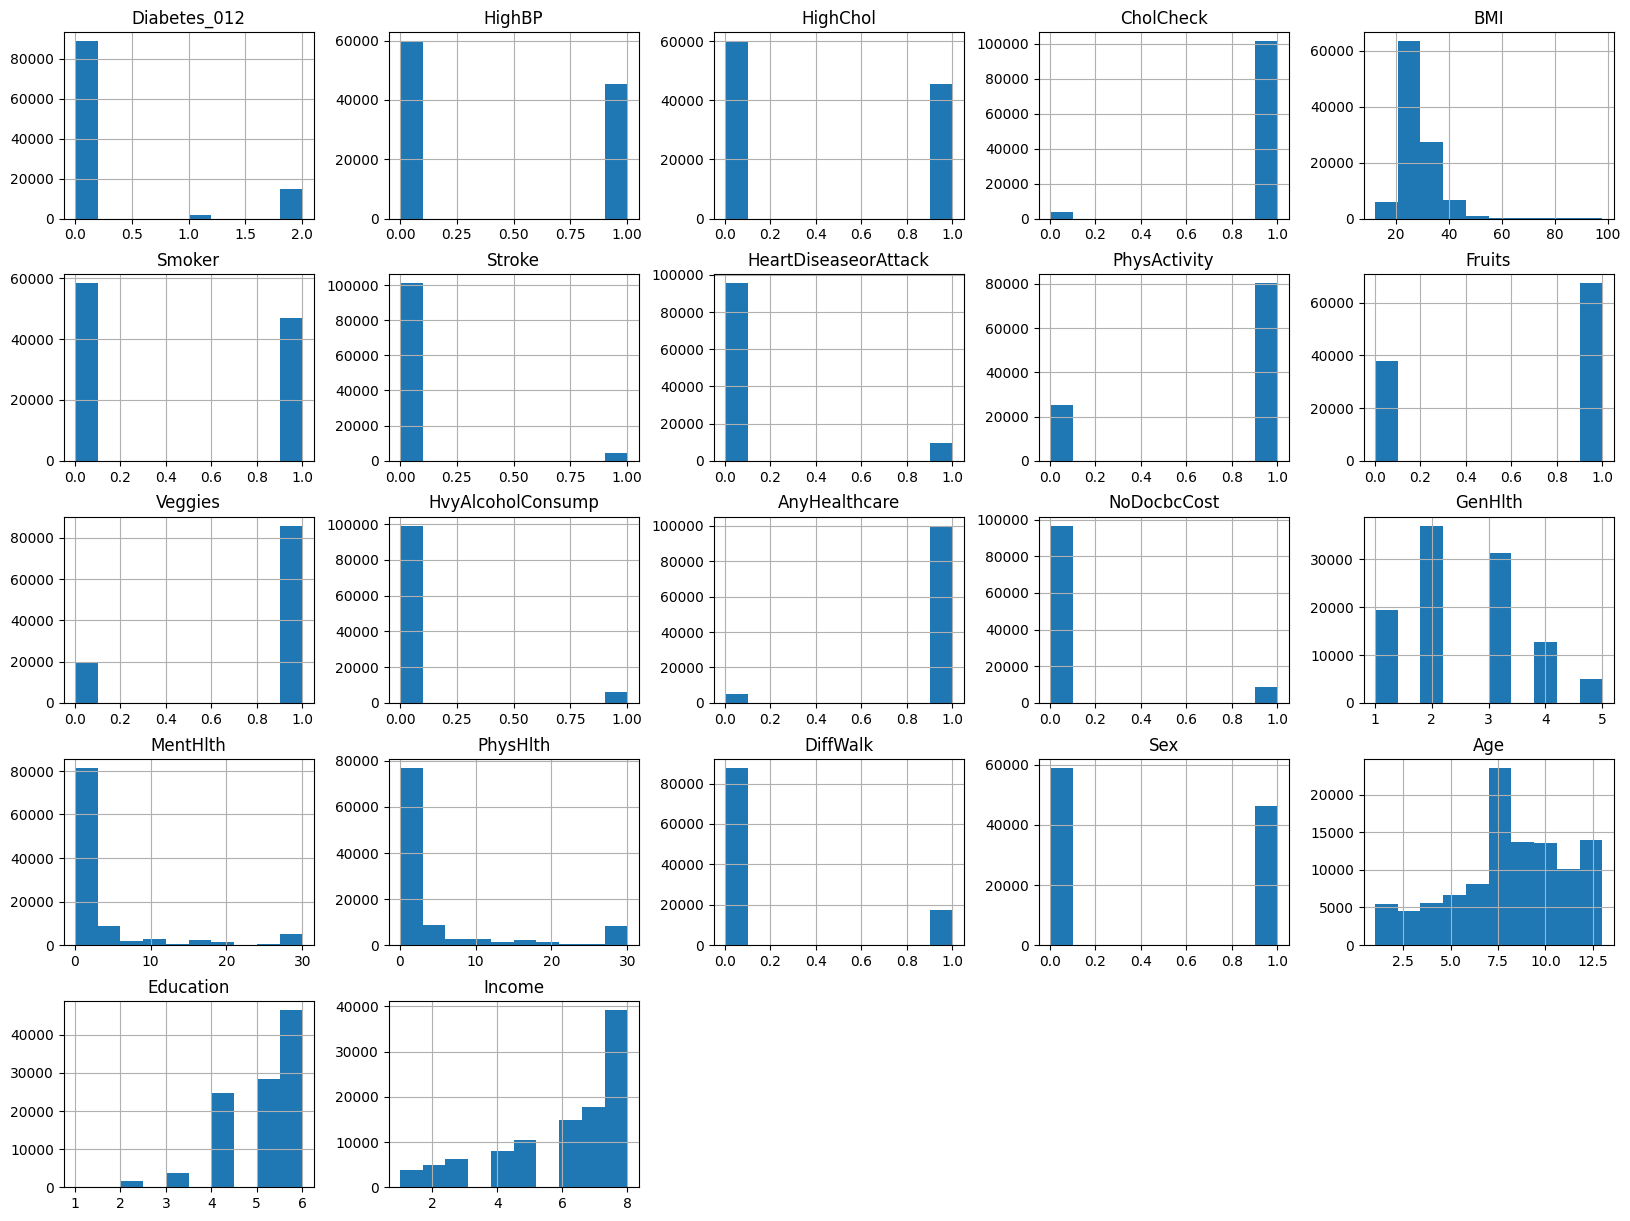

In [ ]:
df_original.hist(figsize=(20,15));

## Факторный анализ

### Проверка на применимость факторного анализа

Критерий Бартлетта

In [ ]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_norm)
print('Критерий Бартлетта',chi_square_value,'p_value', p_value)

Критерий Бартлетта 280671.6830124926 p_value 0.0


the p-value 0, тест статистически значим

Тест Кайзера-Мейера-Олкина (КМО)



In [ ]:
kmo_all, kmo_model = calculate_kmo(df_norm)
print("Тест KMO",kmo_model)

Тест KMO 0.7943619333923831


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


КМО близок к единице, следовательно данные подходят для проведения факторного анализа

### Метод главных компонент

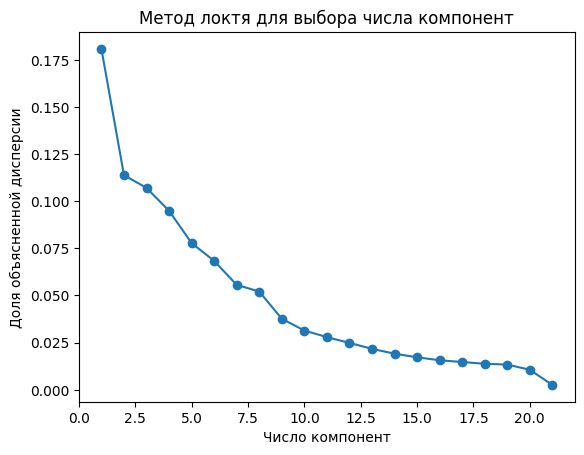

In [ ]:
pca = PCA()

pca.fit_transform(df_norm)


explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel("Число компонент")
plt.ylabel("Доля объясненной дисперсии")
plt.title("Метод локтя для выбора числа компонент")
plt.show()

Как можно заметить, оптимальное число компонент - 2

In [ ]:
fa = Factor(df, n_factor=2, method='pa')
res = fa.fit()

In [ ]:
 res.get_loadings_frame(threshold=0.3)

,factor 0,factor 1
GenHlth,-0.736400,0.052273
DiffWalk,-0.620078,-0.007111
PhysHlth,-0.598070,0.100379
Income,0.539889,-0.200556
HighBP,-0.421621,-0.354449
Education,0.417272,-0.147594
PhysActivity,0.378579,-0.064286
MentHlth,-0.372186,0.262632
HeartDiseaseorAttack,-0.344534,-0.217591
Stroke,-0.263433,-0.099986


Данные факторы можно назвать "Уровень жизни" и "Возрастные изменения".

### Факторный анализ

#### varimax

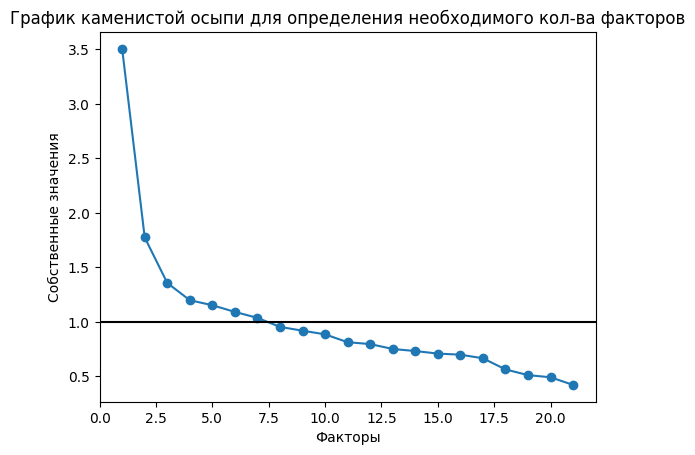

In [ ]:
fa = FactorAnalyzer()
fa.fit(df_norm)
ev, v = fa.get_eigenvalues()
ev
plt.scatter(range(1,df_norm.shape[1]+1),ev)
plt.plot(range(1,df_norm.shape[1]+1),ev)
plt.title('График каменистой осыпи для определения необходимого кол-ва факторов')

plt.xlabel('Факторы')
plt.ylabel('Собственные значения')
plt.axhline(y=1,c='k');

В данном методе предлагается разбить выборку на 7 факторов. Рассчитаем корреляционную матрицу

In [ ]:
fa = FactorAnalyzer()
fa.set_params(n_factors=7, rotation='varimax')
fa.fit(df_norm)
loadings = fa.loadings_
loadings = np.abs(loadings)

In [ ]:
df_fa = pd.DataFrame(loadings).reset_index()
df_fa.columns=['№', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7']
df_fa = df_fa.merge(questions, how='left', left_index=True, right_index=True)
df_fa.columns = ['№', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7', 'check_health']
df_fa

,№,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,check_health
0,0,0.075856,0.537332,0.101083,0.079135,0.039275,0.015851,0.280831,HighBP
1,1,0.067588,0.420116,0.017095,0.072176,0.030519,0.015035,0.131348,HighChol
2,2,0.019289,0.103747,0.004824,0.177930,0.028422,0.041453,0.066847,CholCheck
3,3,0.140034,0.062313,0.040053,0.012561,0.099306,0.057039,0.533367,BMI
4,4,0.106472,0.170707,0.153186,0.019905,0.049040,0.657507,0.008095,Smoker
5,5,0.167883,0.264799,0.036187,0.032128,0.040523,0.018260,0.076756,Stroke
6,6,0.166685,0.430436,0.000225,0.028792,0.051361,0.030237,0.028449,HeartDiseaseorAttack
7,7,0.260327,0.094637,0.201404,0.031007,0.213205,0.009107,0.120663,PhysActivity
8,8,0.056879,0.012405,0.011530,0.037161,0.495861,0.066498,0.073394,Fruits
9,9,0.057449,0.045306,0.128926,0.013084,0.504425,0.049030,0.002720,Veggies


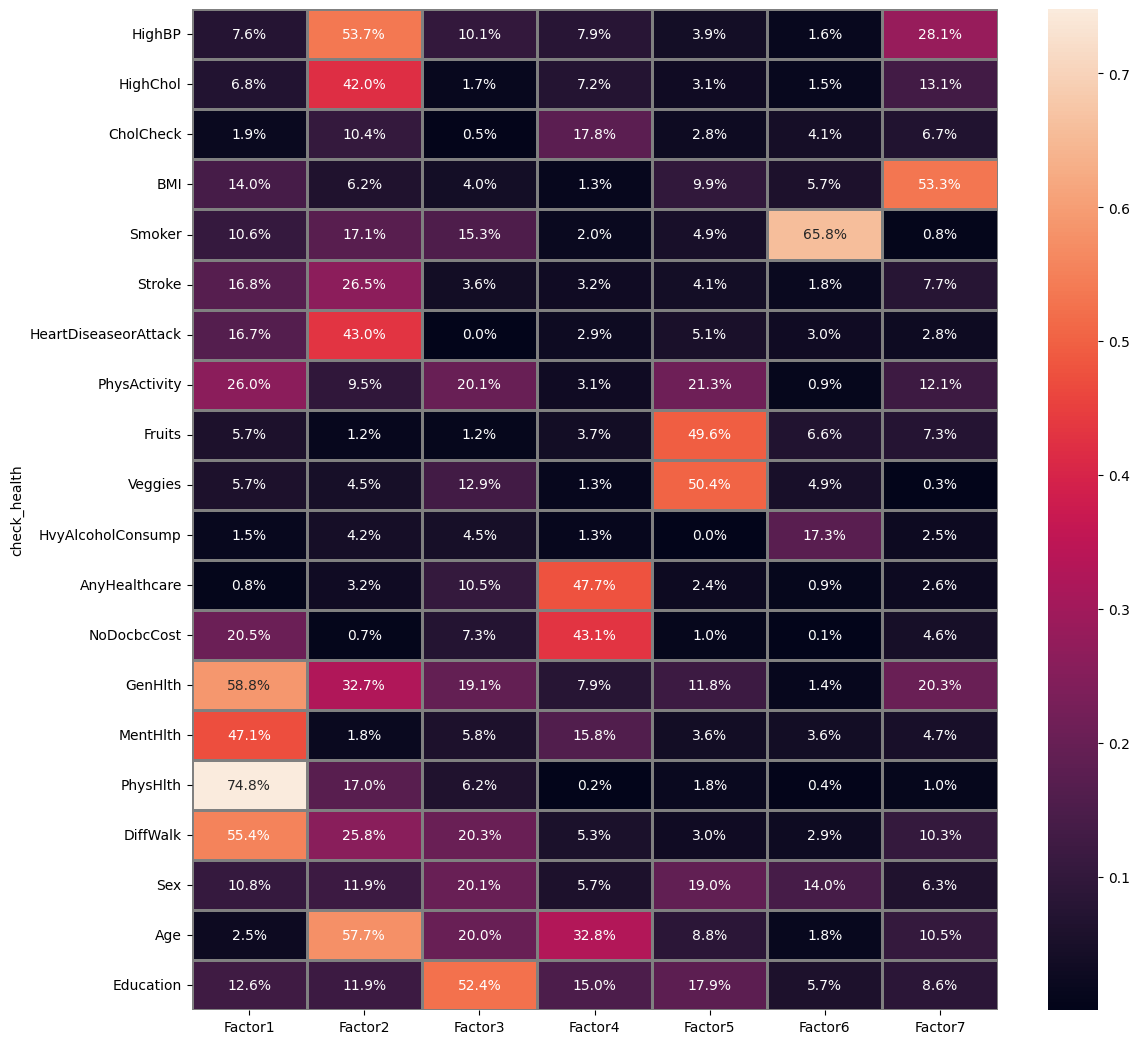

In [ ]:
df_fa_pivot = (df_fa.pivot_table(index='check_health')
               .sort_values(by=['№']).drop(columns=['№']))
plt.figure(figsize=(13, 13))
sns.heatmap(df_fa_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

#### geomin_ort

In [ ]:
fa = FactorAnalyzer()
fa.set_params(n_factors=7, rotation='geomin_ort')
fa.fit(df_norm)
loadings = fa.loadings_
loadings = np.abs(loadings)

In [ ]:
df_fa = pd.DataFrame(loadings).reset_index()
df_fa.columns=['№', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7']
df_fa = df_fa.merge(questions, how='left', left_index=True, right_index=True)
df_fa.columns = ['№', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7', 'check_health']
df_fa

,№,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,check_health
0,0,0.254095,0.475916,0.035208,0.021052,0.062279,0.001363,0.308213,HighBP
1,1,0.181656,0.380803,0.033844,0.022505,0.045227,0.019213,0.151330,HighChol
2,2,0.034177,0.098656,0.067277,0.022973,0.157518,0.040128,0.086229,CholCheck
3,3,0.218223,0.023018,0.001441,0.073804,0.048263,0.037812,0.515258,BMI
4,4,0.186870,0.131382,0.056074,0.021433,0.004535,0.665525,0.019906,Smoker
5,5,0.227748,0.219887,0.002157,0.024420,0.020958,0.022557,0.082120,Stroke
6,6,0.264403,0.377429,0.038819,0.036068,0.041855,0.024019,0.027410,HeartDiseaseorAttack
7,7,0.343452,0.009449,0.111736,0.175502,0.077552,0.026665,0.101439,PhysActivity
8,8,0.108706,0.043606,0.030558,0.483693,0.047850,0.074978,0.063775,Fruits
9,9,0.143438,0.014916,0.141667,0.486526,0.021040,0.031345,0.001558,Veggies


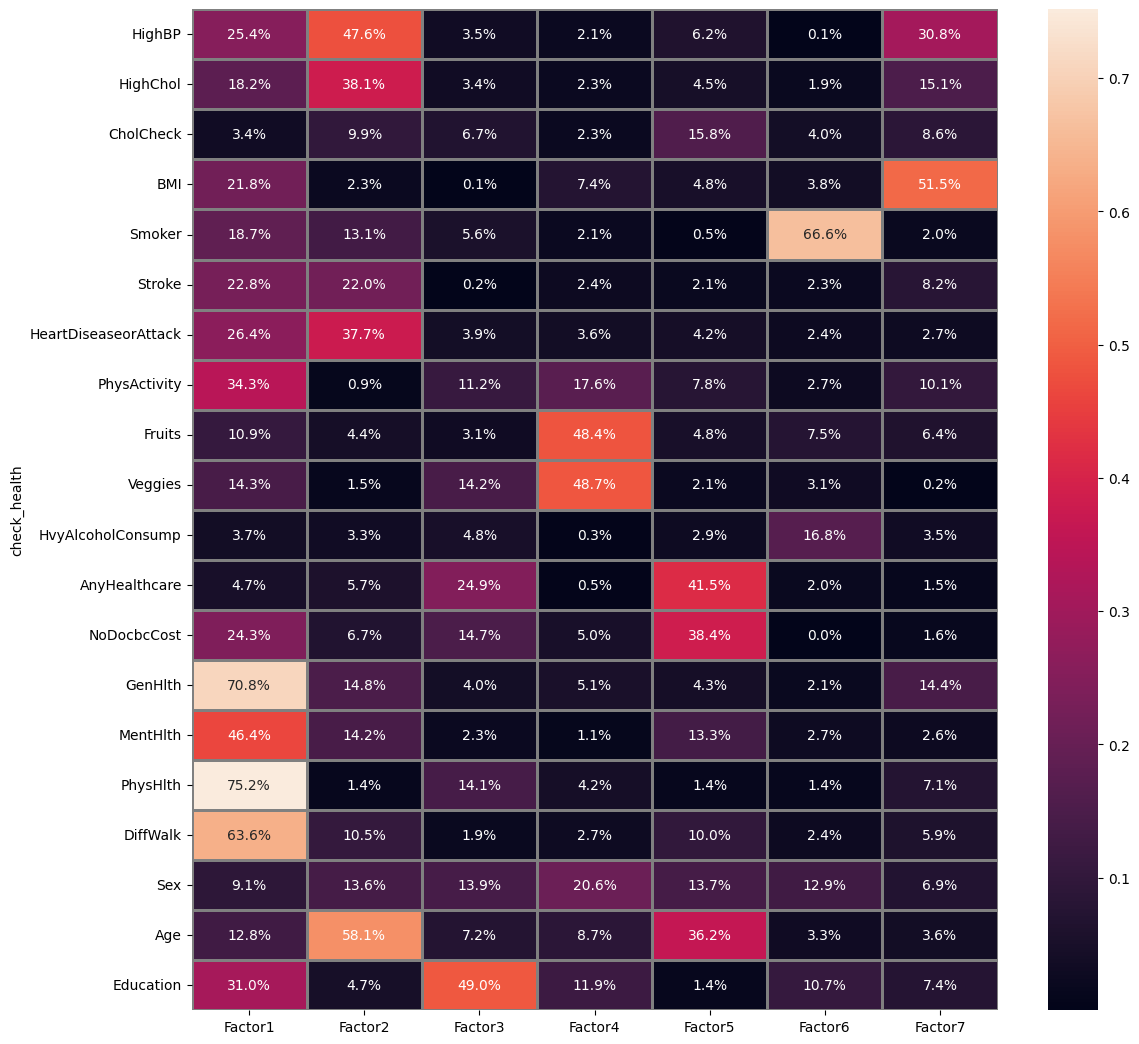

In [ ]:
df_fa_pivot = (df_fa.pivot_table(index='check_health')
               .sort_values(by=['№']).drop(columns=['№']))
plt.figure(figsize=(13, 13))
sns.heatmap(df_fa_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

#### Центроидный метод

In [ ]:
fa_centroid = FactorAnalyzer(n_factors=7, method='ml', rotation=None)
res_1 = fa_centroid.fit(df_norm)

# Матрица факторных нагрузок (центроидный метод)
data_1 = pd.DataFrame(data=fa_centroid.loadings_)
data_1

,0,1,2,3,4,5,6
0,0.403407,0.387331,-0.103660,0.143773,0.004688,0.211144,0.091479
1,0.278603,0.320440,-0.032541,0.105509,0.047339,0.096218,0.141316
2,0.050980,0.166907,0.048385,0.021352,-0.107944,0.030474,-0.013354
3,0.260323,-0.045452,-0.012655,0.290006,-0.225081,0.369640,-0.079890
4,0.230429,0.062231,-0.094176,0.049913,0.179686,-0.097633,-0.023717
5,0.252383,0.101548,0.011238,-0.016374,0.088101,-0.033746,0.022511
6,0.327770,0.220359,0.004247,0.056242,0.178263,0.003959,-0.015234
7,-0.371726,0.039743,0.064174,-0.098641,0.131812,0.070483,-0.003530
8,-0.142612,0.150301,0.182931,-0.437924,0.099496,0.260262,-0.182161
9,-0.195347,0.088497,0.212256,-0.243473,0.088133,0.193090,-0.052585


In [ ]:
df_fa = pd.DataFrame(fa_centroid.loadings_).reset_index()
df_fa.columns=['№', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7']
df_fa = df_fa.merge(questions, how='left', left_index=True, right_index=True)
df_fa.columns = ['№', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7', 'check_health']
df_fa

,№,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,check_health
0,0,0.403407,0.387331,-0.103660,0.143773,0.004688,0.211144,0.091479,HighBP
1,1,0.278603,0.320440,-0.032541,0.105509,0.047339,0.096218,0.141316,HighChol
2,2,0.050980,0.166907,0.048385,0.021352,-0.107944,0.030474,-0.013354,CholCheck
3,3,0.260323,-0.045452,-0.012655,0.290006,-0.225081,0.369640,-0.079890,BMI
4,4,0.230429,0.062231,-0.094176,0.049913,0.179686,-0.097633,-0.023717,Smoker
5,5,0.252383,0.101548,0.011238,-0.016374,0.088101,-0.033746,0.022511,Stroke
6,6,0.327770,0.220359,0.004247,0.056242,0.178263,0.003959,-0.015234,HeartDiseaseorAttack
7,7,-0.371726,0.039743,0.064174,-0.098641,0.131812,0.070483,-0.003530,PhysActivity
8,8,-0.142612,0.150301,0.182931,-0.437924,0.099496,0.260262,-0.182161,Fruits
9,9,-0.195347,0.088497,0.212256,-0.243473,0.088133,0.193090,-0.052585,Veggies


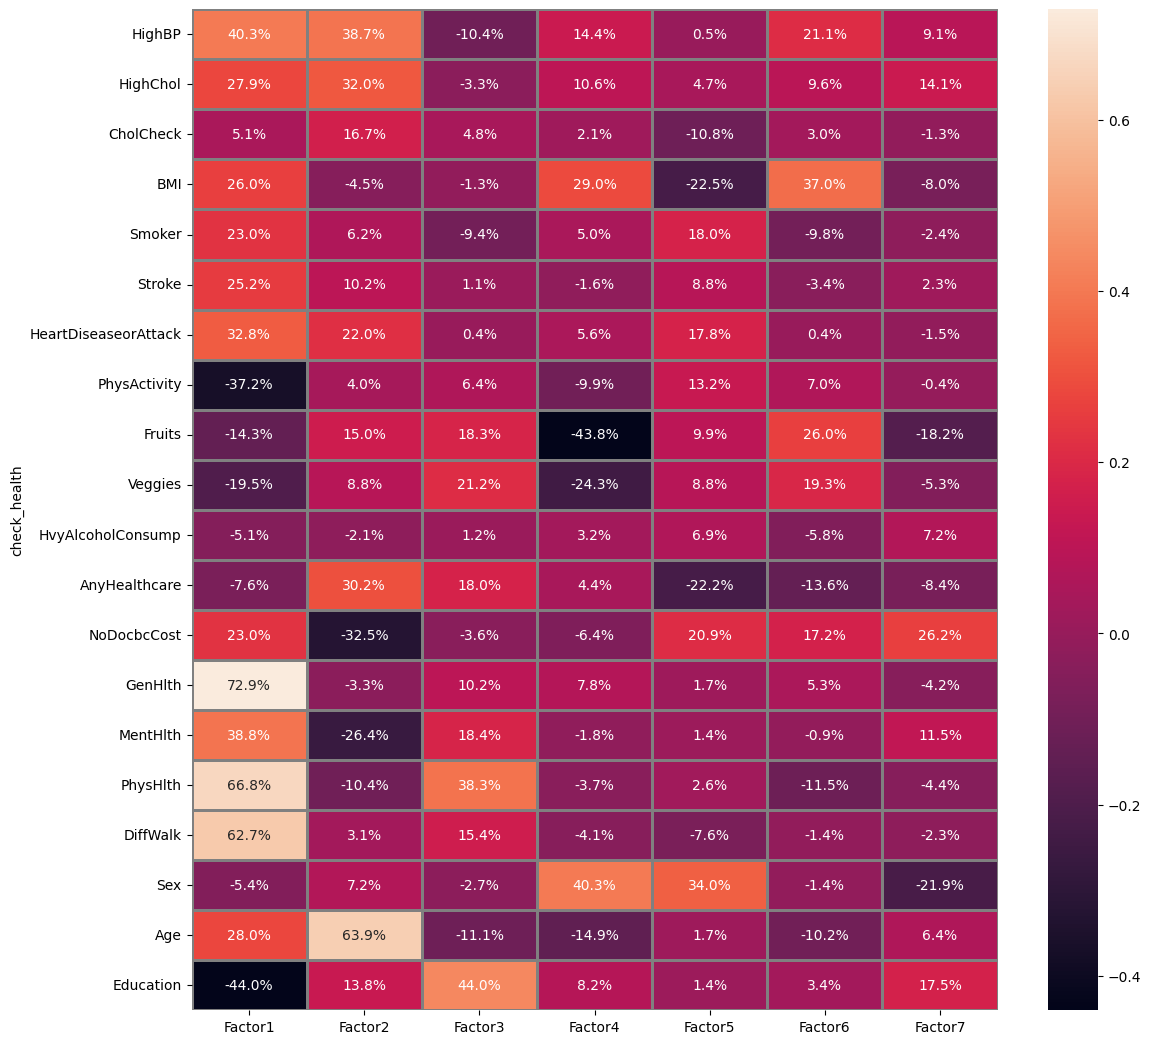

In [ ]:
df_fa_pivot = (df_fa.pivot_table(index='check_health')
               .sort_values(by=['№']).drop(columns=['№']))
plt.figure(figsize=(13, 13))
sns.heatmap(df_fa_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');